データを読み込み

In [96]:
import pandas as pd

# 学習用データ
train = pd.read_csv("train.csv",index_col=0)
# 評価用データ
test = pd.read_csv("test.csv",index_col=0)
## 応募用サンプルファイル
sample_submit = pd.read_csv("sample_submit.csv",index_col=0,header=None)

データの概要を確認

学習用データ

In [97]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


評価用データ<br>
学習用データにはあった目的変数であるカラムsurvivedが無い<br>
答えのある学習用データの乗客の情報を元にして機械学習により生存の法則をモデル化し、そのモデルを評価用データに当てはめて、評価用データに記録されている各乗客が生存できるのか否かを予測

In [98]:
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S


In [99]:
sample_submit.head(10)

,1
0,
0,0
1,1
2,0
5,1
6,1
8,1
10,1
12,1
14,1


データのサイズ

In [100]:
print(train.shape) #学習用データは445人の乗客情報
print(test.shape) #評価用データは446人

(445, 8)
(446, 7)


欠損値やデータ型を確認

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 3 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    int64  
 1   pclass    445 non-null    int64  
 2   sex       445 non-null    object 
 3   age       360 non-null    float64
 4   sibsp     445 non-null    int64  
 5   parch     445 non-null    int64  
 6   fare      445 non-null    float64
 7   embarked  443 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.3+ KB


 データを分析

In [102]:
train["survived"].value_counts()

,count
survived,
0,266
1,179


In [103]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


**pd.get_dummies(train)**<br>
train データフレームに含まれるカテゴリ変数（文字列やカテゴリ型の列）を ダミー変数（0/1の数値列） に変換する。

**.corrwith(train["survived"])**<br>
train["survived"]（生存フラグ: 0=死亡, 1=生存）との 相関係数（ピアソン相関） を、それぞれの列について計算する。
<br><br>
相関係数が 1 に近いと正の相関、-1 に近いと負の相関が強く、0に近いと相関が弱いことを表します。結果から、性別や客室クラスとの相関が強く、年齢や乗船した港やとの相関は比較的弱いようです。

In [104]:
pd.get_dummies(train).corrwith(train["survived"])

,0
survived,1.000000
pclass,-0.358097
age,-0.081394
sibsp,-0.045087
parch,0.079669
fare,0.258605
sex_female,0.559465
sex_male,-0.559465
embarked_C,0.182568
embarked_Q,0.005062


**pclassが1に近い高級クラスほど、survivedが1の割合が多い**

**train[["pclass","survived"]]**<br>
データフレーム train から
「客室クラス (pclass)」と「生存フラグ (survived)」だけを取り出す。

**.groupby(["pclass"])**<br>
pclass ごとにグループ化する。

In [105]:
train[["pclass","survived"]].groupby(["pclass"]).mean()

,survived
pclass,
1,0.685185
2,0.443299
3,0.258333


女性の生存率が圧倒的に高い

In [106]:
train[["sex","survived"]].groupby(["sex"]).mean()

,survived
sex,
female,0.775641
male,0.200692


**データの前処理**<br>
学習用データと評価用データを一括で処理するため、まずは両データを結合

In [107]:
data = pd.concat([train,test])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
7,0.0,3,male,2.0,3,1,21.0750,S
9,1.0,2,female,14.0,1,0,30.0708,C
11,1.0,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
885,NaN,3,female,39.0,0,5,29.1250,Q
886,NaN,2,male,27.0,0,0,13.0000,S
887,NaN,1,female,19.0,0,0,30.0000,S


欠損値の個数

In [108]:
data.isnull().sum()

,0
survived,446
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2


In [109]:
data["age"].isnull().sum()

np.int64(177)

ageには全体の平均値、embarkedには最頻値で補完

In [110]:
#欠損値（NaN）を、"age" 列の 平均値 で埋める。
data["age"] = data["age"].fillna(data["age"].mean())
data["age"]

,age
id,
3,35.0
4,35.0
7,2.0
9,14.0
11,58.0
...,...
885,39.0
886,27.0
887,19.0


In [111]:
data["age"].isnull().sum()

np.int64(0)

In [112]:
data["embarked"]=data["embarked"].fillna(data["embarked"].mode())
data["embarked"]

,embarked
id,
3,S
4,S
7,S
9,C
11,S
...,...
885,Q
886,S
887,S


dataをダミー化

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 3 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    float64
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [114]:
#ワンホットベクトルに変換する関数
data=pd.get_dummies(data, dtype=int)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 3 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    445 non-null    float64
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_female  891 non-null    int64  
 7   sex_male    891 non-null    int64  
 8   embarked_C  891 non-null    int64  
 9   embarked_Q  891 non-null    int64  
 10  embarked_S  891 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 83.5 KB


In [116]:
data["sex_female"]

,sex_female
id,
3,1
4,0
7,0
9,1
11,1
...,...
885,1
886,0
887,1


**グラフを描く理由**<br>
人間がデータを理解して「より良い前処理や特徴量を作る」ための武器

「特徴量エンジニアリングや前処理の発想を得る」ためにとても有効 → 間接的に精度アップにつながる

ターゲットの割合を確認

<Axes: xlabel='survived', ylabel='count'>

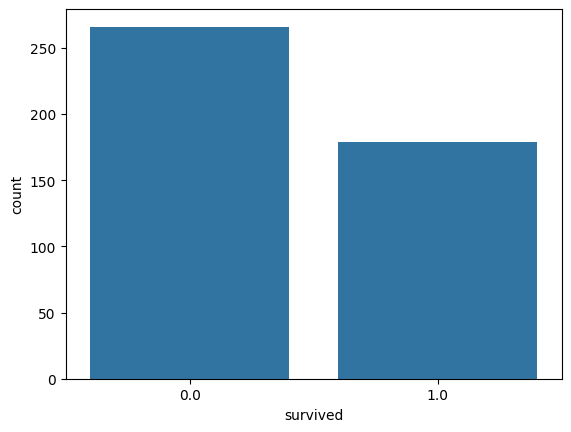

In [117]:
import seaborn as sns
target_col = "survived"
sns.countplot(x=target_col, data=data)

カテゴリ値の割合を確認

<Axes: xlabel='pclass', ylabel='count'>

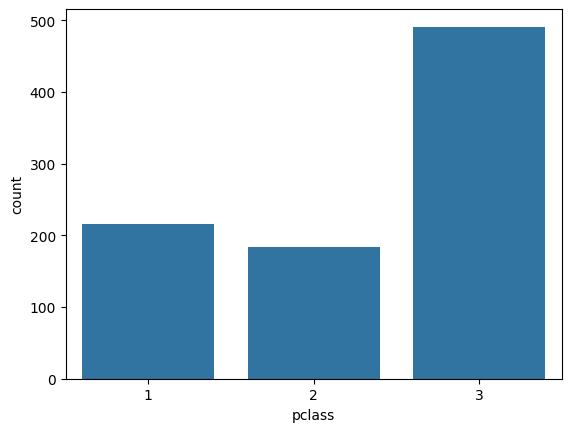

In [118]:
col = "pclass"
sns.countplot(x=col, data=data)

ターゲットの値ごとのあるカラムの割合を確認

<Axes: xlabel='pclass', ylabel='count'>

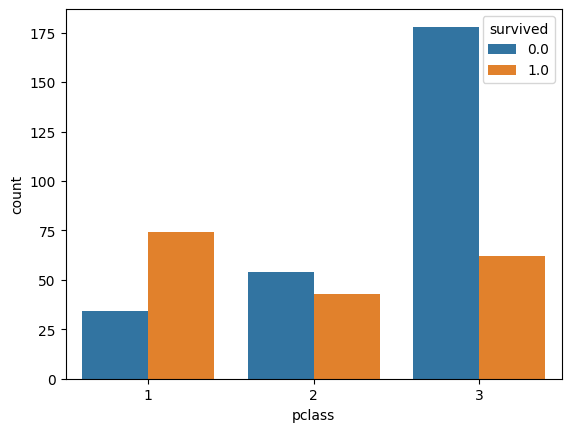

In [119]:
col = "pclass"
sns.countplot(x=col, hue=target_col, data=data)

<Axes: xlabel='sex_female', ylabel='count'>

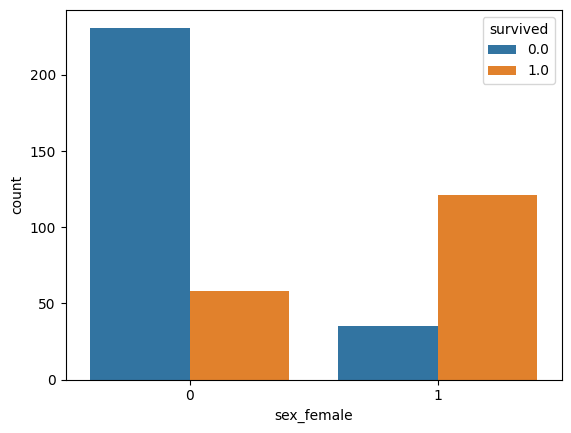

In [120]:
col = "sex_female"
sns.countplot(x=col, hue=target_col, data=data)

<Axes: title={'center': 'Distribution of age'}, ylabel='Frequency'>

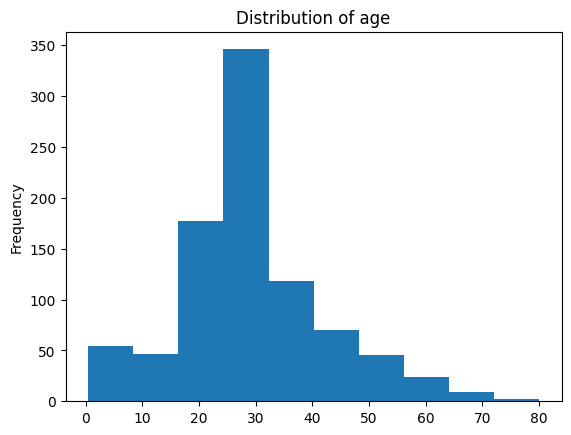

In [121]:
col = "age"
data[col].plot(kind="hist", bins=10, title='Distribution of {}'.format(col))

<Axes: title={'center': 'Distribution of fare'}, ylabel='Frequency'>

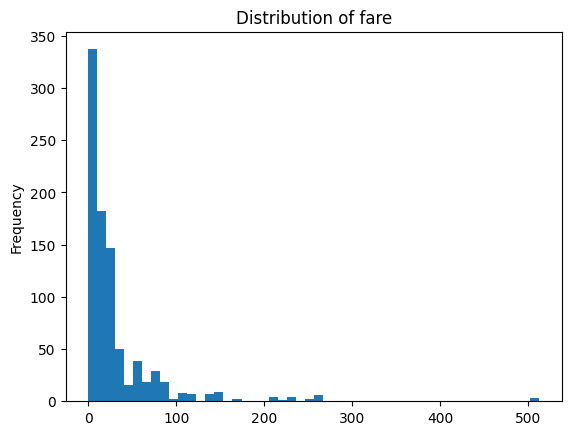

In [122]:
col = "fare"
data[col].plot(kind="hist", bins=50, title='Distribution of {}'.format(col))

★外れ値の処理

In [123]:
near = data[data["fare"].between(500,600)]
near

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
id,,,,,,,,,,,
679,1.0,1,36.0,0,1,512.3292,0,1,1,0,0
737,1.0,1,35.0,0,0,512.3292,0,1,1,0,0
258,NaN,1,35.0,0,0,512.3292,1,0,1,0,0


★外れ値の置き換え<br>
.isin([679, 737]) で複数の PassengerId を指定

In [124]:
fare_mean = data["fare"].mean()
data.loc[data.index.isin([258,679,737]),"fare"] = fare_mean

In [125]:
train = data.loc[train.index]
test = data.loc[test.index]

In [126]:
train.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
id,,,,,,,,,,,
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,0,0,1
7,0.0,3,2.0,3,1,21.0750,0,1,0,0,1
9,1.0,2,14.0,1,0,30.0708,1,0,1,0,0
11,1.0,1,58.0,0,0,26.5500,1,0,0,0,1


★fareをビン化

In [127]:
print(pd.qcut(data["fare"], 4))

id
3       (31.0, 263.0]
4      (7.91, 14.454]
7      (14.454, 31.0]
9      (14.454, 31.0]
11     (14.454, 31.0]
            ...      
885    (14.454, 31.0]
886    (7.91, 14.454]
887    (14.454, 31.0]
889    (14.454, 31.0]
890    (-0.001, 7.91]
Name: fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] <
                                           (31.0, 263.0]]


In [128]:
test.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
id,,,,,,,,,,,
0,NaN,3,22.000000,1,0,7.2500,0,1,0,0,1
1,NaN,1,38.000000,1,0,71.2833,1,0,1,0,0
2,NaN,3,26.000000,0,0,7.9250,1,0,0,0,1
5,NaN,3,29.699118,0,0,8.4583,0,1,0,1,0
6,NaN,1,54.000000,0,0,51.8625,0,1,0,0,1


In [129]:
test = test.drop(["survived"],axis = 1)

In [130]:
print(test.shape,train.shape)

(446, 10) (445, 11)


**モデリング**<br>
目的変数とそれ以外に学習用データを分割

In [131]:
y = train["survived"]
x = train.drop(["survived"],axis = 1)

In [132]:
y.head()

,survived
id,
3,1.0
4,0.0
7,0.0
9,1.0
11,1.0


In [133]:
x.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
id,,,,,,,,,,
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0
11,1,58.0,0,0,26.5500,1,0,0,0,1


In [134]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x,y)

LogisticRegression(max_iter=1000)

In [135]:
#predict_proba といった分類確信度のスコアを取得できるメソッド
#[:,1]…: は「全行」、
#1 は「2列目（インデックスは0始まりなのでクラス1の確率）」
#クラス1に属する確率だけを取り出す。
pred  = model.predict_proba(test)[:,1]

各要素は そのサンプルがクラス1である確率。
* 0.105781 → 10.6% の確率でクラス1
* 0.92529693 → 92.5% の確率でクラス1
* 0.64274681 → 64.3% の確率でクラス1
* 0.16363808 → 16.4% の確率でクラス1
* 0.27498188 → 27.5% の確率でクラス1

In [136]:
pred[:5]

array([0.10423606, 0.92828699, 0.63241328, 0.16341942, 0.27938924])

In [137]:
print(len(pred))

446


In [138]:
# 課題が0/1のラベル提出を要求する場合はこちら
sample_submit[1] = (pred >= 0.5).astype(int)
sample_submit.to_csv("submit.csv", index=True, header=False, encoding="utf-8")

In [139]:
out = pd.DataFrame({0: test.index, 1: pred})
out.to_csv("submit.csv",
           index=False, header=False,
           encoding="utf-8",
           lineterminator="\n",
           float_format="%.10f")

In [140]:
import pandas as pd
df = pd.read_csv("submit.csv", header=None)
assert df.shape == (446, 2)
assert df[1].between(0, 1).all()
print("OK")

OK


特徴量選択とは、機械学習のモデルを使用する際に有効な特徴量の組み合わせを探索するプロセスのことを表しています。

* データの訓練数と特徴の数
* NULL値が含まれているかどうか
* よい特徴量ならば、ターゲットの値と高い相関を持っているという仮定で特徴量を削減

特徴量エンジニアリングとは、機械学習モデルの予測精度を向上させるための入力データの加工手法
1. 特徴量の選択
2. 特徴量のスケーリング
3. 新しい特徴量の生成

特徴量の種類
* PassengerId : 乗客のID
* Survived : 生死(0:死亡,1:生存)
* Pclass : 乗客の社会階級(1:Upper, 2:Middle, 3:Lower)
* Name : 名前
* Sex : 性別
* Age : 年齢
* SibSp : 一緒に乗っている兄弟、配偶者の数
* Parch : 一緒に乗っている親、子供の数
* Ticket : チケットの番号
* Fare : 乗船料
* Cabin : 客室番号
* Embarked : 乗船した港